In [ ]:
#install libraries
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.8 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
import pandas as pd
import gdown

download_url = 'https://drive.google.com/uc?export=download&id=1cz_Ci7tbCpHTZX3KAJ_zdz41u9_pVF2p'

filename = 'Bitext_Sample_Customer_Support_Training_Dataset_27K_responses-v11.csv'

gdown.download(download_url, filename, quiet=False)


Downloading...
From: https://drive.google.com/uc?export=download&id=1cz_Ci7tbCpHTZX3KAJ_zdz41u9_pVF2p
To: /content/Bitext_Sample_Customer_Support_Training_Dataset_27K_responses-v11.csv
100%|██████████| 19.2M/19.2M [00:00<00:00, 84.2MB/s]


'Bitext_Sample_Customer_Support_Training_Dataset_27K_responses-v11.csv'

In [ ]:
df = pd.read_csv(filename)

df.head()

,flags,instruction,category,intent,response
0,B,question about cancelling order {{Order Number}},ORDER,cancel_order,I've understood you have a question regarding ...
1,BQZ,i have a question about cancelling oorder {{Or...,ORDER,cancel_order,I've been informed that you have a question ab...
2,BLQZ,i need help cancelling puchase {{Order Number}},ORDER,cancel_order,I can sense that you're seeking assistance wit...
3,BL,I need to cancel purchase {{Order Number}},ORDER,cancel_order,I understood that you need assistance with can...
4,BCELN,"I cannot afford this order, cancel purchase {{...",ORDER,cancel_order,I'm sensitive to the fact that you're facing f...


In [ ]:
df.drop(df.columns.difference(['intent', 'instruction']), axis=1, inplace=True)
df.rename(columns={'instruction': 'text'}, inplace=True)
df.head()

,text,intent
0,question about cancelling order {{Order Number}},cancel_order
1,i have a question about cancelling oorder {{Or...,cancel_order
2,i need help cancelling puchase {{Order Number}},cancel_order
3,I need to cancel purchase {{Order Number}},cancel_order
4,"I cannot afford this order, cancel purchase {{...",cancel_order


In [ ]:
intent_counts = df['intent'].value_counts()
print("Intent counts:\n", intent_counts)

Intent counts:
 edit_account                1000
switch_account              1000
check_invoice               1000
complaint                   1000
contact_customer_service    1000
delivery_period              999
registration_problems        999
check_payment_methods        999
contact_human_agent          999
payment_issue                999
newsletter_subscription      999
get_invoice                  999
place_order                  998
cancel_order                 998
track_refund                 998
change_order                 997
get_refund                   997
create_account               997
check_refund_policy          997
review                       997
set_up_shipping_address      997
delivery_options             995
delete_account               995
recover_password             995
track_order                  995
change_shipping_address      973
check_cancellation_fee       950
Name: intent, dtype: int64


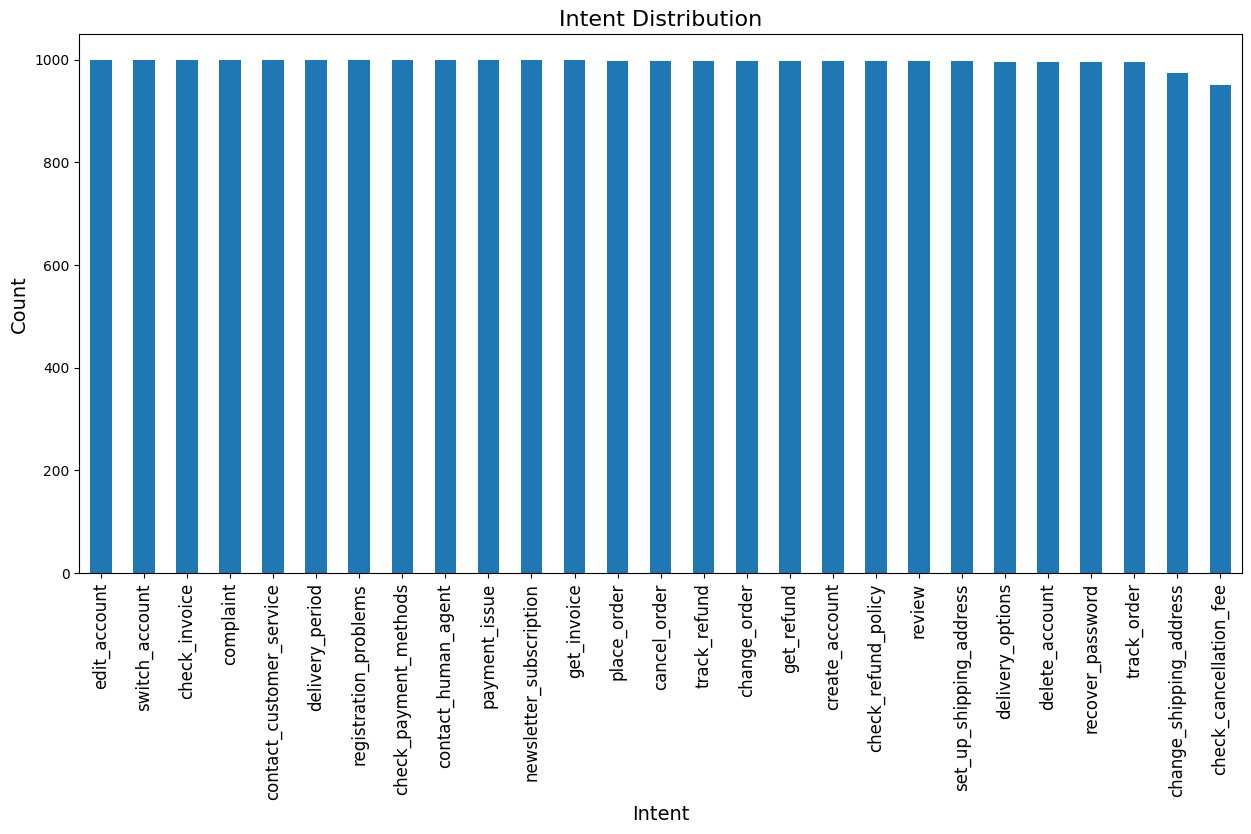

In [ ]:
import matplotlib.pyplot as plt


intents = df['intent'].unique()
counts = df['intent'].value_counts()

plt.figure(figsize=(15, 7))
counts.plot(kind='bar')

plt.xlabel("Intent", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Intent Distribution", fontsize=16)

plt.xticks(rotation=90, fontsize=12)

plt.show()


In [ ]:
from datasets import load_dataset
dataset1 = load_dataset("nelson2424/Grocery_chatbot_text_v2")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/1070 [00:00<?, ? examples/s]

In [ ]:
df2 = dataset1['train'].to_pandas()
df2.head()

,text,category,items
0,We need a ride for the weekend,Not a valid command,{}.
1,"We should pick up aspirin, sunflower seeds, sa...",Add elements to the list,(Aspirin:Health and Beauty) (Sunflower Seeds:F...
2,"We need more beer, board games and pretzels.",Add elements to the list,(Beer:Food) (Board Games:Other) (Pretzels:Food).
3,I need to fix the leak in the bathroom,Not a valid command,{}.
4,"Do we still have soy sauce, wine, socks in the...",Not a valid command,(Soy Sauce:Food) (Wine:Food) (Socks:Other).


In [ ]:
df2['intent'] = df2['category'].replace(
    {
        'Not a valid command' : 'unknown',
        'Add elements to the list' : 'edit_product_in_order',
        'Remove elements from the list' : 'edit_product_in_order'
    })

df2.drop(df2.columns.difference(['text', 'intent']), axis=1, inplace=True)

df2.head()

,text,intent
0,We need a ride for the weekend,unknown
1,"We should pick up aspirin, sunflower seeds, sa...",edit_product_in_order
2,"We need more beer, board games and pretzels.",edit_product_in_order
3,I need to fix the leak in the bathroom,unknown
4,"Do we still have soy sauce, wine, socks in the...",unknown


In [ ]:
combined_df = pd.concat([df, df2], ignore_index=True)

In [ ]:
dataset2 = load_dataset("pankajemplay/intent_1816")
df3 = dataset2['train'].to_pandas()
df3.head()

Generating train split:   0%|          | 0/1816 [00:00<?, ? examples/s]

,User Query,Intent,id type,id value,id slot filled,Task,task slot filled,Bot Response,text,__index_level_0__
0,Hello,welcome,None,None,False,None,False,Hello! How can I assist you today?,"{\n ""intent"": ""welcome"",\n ""id type""...",0
1,I want to cancel my order,order detail,None,None,False,cancel,True,Please provide the order number or deal ID to ...,"{\n ""intent"": ""order detail"",\n ""id ...",1
2,I'm not satisfied with this.,raise question,None,None,False,None,False,I'm sorry to hear that. How can I assist you f...,"{\n ""intent"": ""raise question"",\n ""i...",2
3,Where can I find the user manual?,search,None,None,False,None,False,Searching for the user manual...,"{\n ""intent"": ""search"",\n ""id type"":...",3
4,How's the weather today?,small talk,None,None,False,None,False,I'm not sure about the current weather.,"{\n ""intent"": ""small talk"",\n ""id ty...",4


In [ ]:
df3.drop(df3.columns.difference(['User Query', 'Intent']), axis=1, inplace=True)
df3.rename(columns={'User Query': 'text', 'Intent': 'intent'}, inplace=True)
df3.head()

,text,intent
0,Hello,welcome
1,I want to cancel my order,order detail
2,I'm not satisfied with this.,raise question
3,Where can I find the user manual?,search
4,How's the weather today?,small talk


Unique intents: ['welcome' 'order detail' 'raise question' 'search' 'small talk' 'reset'
 'farewell' 'order invoice' 'order shipment' 'order delivery'
 'quote detail']
Intent counts:
 order detail      491
order shipment    250
small talk        238
order delivery    204
order invoice     135
search            125
quote detail      108
raise question     98
reset              75
farewell           53
welcome            39
Name: intent, dtype: int64


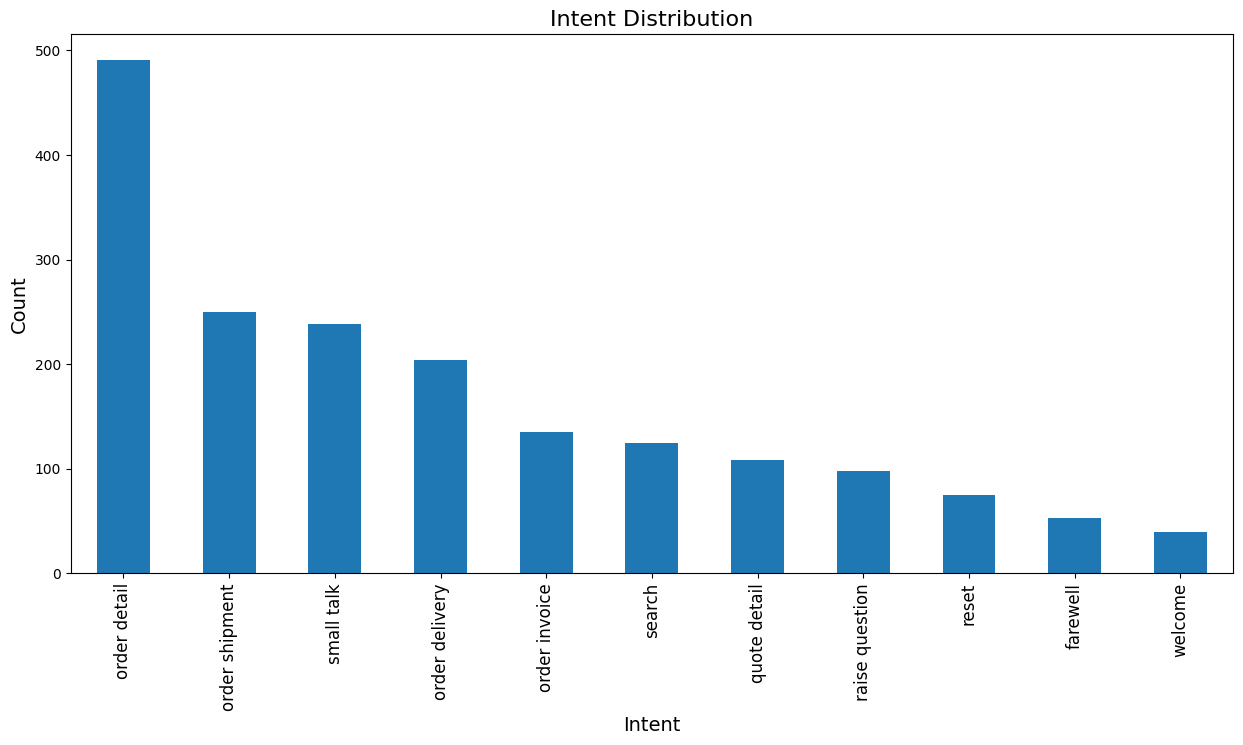

In [ ]:
import matplotlib.pyplot as plt
unique_intents = df3['intent'].unique()
intent_counts = df3['intent'].value_counts()

print("Unique intents:", unique_intents)
print("Intent counts:\n", intent_counts)

# Get the data
intents = df3['intent'].unique()
counts = df3['intent'].value_counts()

# Create the plot
plt.figure(figsize=(15, 7))
intent_counts.plot(kind='bar')

# Add labels and title
plt.xlabel("Intent", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Intent Distribution", fontsize=16)

# Rotate x-axis labels for readability
plt.xticks(rotation=90, fontsize=12)

# Show the plot
plt.show()

In [ ]:
df3 = df3[df3['intent'].isin(['small talk'])]

In [ ]:
combined_df = pd.concat([combined_df, df3], ignore_index=True)
combined_df['intent'] = combined_df['intent'].replace('small talk', 'small_talk')
intent_counts = combined_df['intent'].value_counts()
print("intent_counts:", intent_counts)

intent_counts: edit_account                1000
switch_account              1000
check_invoice               1000
complaint                   1000
contact_customer_service    1000
get_invoice                  999
check_payment_methods        999
registration_problems        999
contact_human_agent          999
payment_issue                999
newsletter_subscription      999
delivery_period              999
track_refund                 998
place_order                  998
cancel_order                 998
change_order                 997
get_refund                   997
create_account               997
check_refund_policy          997
review                       997
set_up_shipping_address      997
delivery_options             995
delete_account               995
recover_password             995
track_order                  995
change_shipping_address      973
check_cancellation_fee       950
unknown                      640
edit_product_in_order        430
small_talk                  

In [ ]:
dataset3 = load_dataset("dipesh/Intent-Classification-small")
df4 = dataset3['train'].to_pandas()
df4.drop(df4.columns.difference(['text', 'intent']), axis=1, inplace=True)
df4.head()

Generating train split:   0%|          | 0/6153 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/684 [00:00<?, ? examples/s]

,text,intent
0,"Thank you, goodbye",goodbye
1,Can you turn the volume down?,volume control
2,play games of xyz 64 bit,play games
3,covid cases,covid cases
4,good day,goodbye


In [ ]:
intent_counts = df4['intent'].value_counts()
print("intent_counts",intent_counts)

intent_counts greet and hello hi kind of things, general check in    718
asking time                                            436
volume control                                         431
goodbye                                                429
tell me about                                          429
tell me joke                                           428
send email                                             427
play on youtube                                        423
tell me news                                           290
places near me                                         289
asking weather                                         284
play games                                             282
open website                                           147
asking date                                            146
download youtube video                                 145
send whatsapp message                                  145
take screenshot                           

In [ ]:
df4 = df4[df4['intent'].isin(['greet and hello hi kind of things, general check in', 'goodbye'])]
df4 = df4.replace(to_replace=('greet and hello hi kind of things, general check in'), value='welcome')
df4 = df4.replace(to_replace=('goodbye'), value='farewell')

unique_intents = df4['intent'].unique()
print("Unique intents:", unique_intents)

Unique intents: ['farewell' 'welcome']


In [ ]:
combined_df = pd.concat([combined_df, df4], ignore_index=True)

In [ ]:
import gdown

download_url = 'https://drive.google.com/uc?export=download&id=15r8k6zMZ364nBlnUPSYpcHSClWOhLOe-'

filename = 'df_search.csv'

gdown.download(download_url, filename, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=15r8k6zMZ364nBlnUPSYpcHSClWOhLOe-
To: /content/df_search.csv
100%|██████████| 35.8k/35.8k [00:00<00:00, 38.2MB/s]


'df_search.csv'

In [ ]:

df5 = pd.read_csv(filename)

df5.head()

,text,intent
0,Looking for studio monitors,search
1,Drone selection,search
2,Need a new CPU (processor),search
3,RAM (memory) search,search
4,Looking to buy a UPS (uninterruptible power s...,search


In [ ]:
df5

,text,intent
0,Looking for studio monitors,search
1,Drone selection,search
2,Need a new CPU (processor),search
3,RAM (memory) search,search
4,Looking to buy a UPS (uninterruptible power s...,search
...,...,...
995,Any CPU coolers available,search
996,Motherboard search,search
997,"External hard drive options, please",search
998,Show me available optical drives,search


In [ ]:
 combined_df = pd.concat([combined_df, df5], ignore_index=True)

In [ ]:
import gdown

download_url = 'https://drive.google.com/uc?export=download&id=1_-g7hwmu4BJfREcTh8vj-VqvjZzePIYc'

filename = 'qa_Electronics.json.gz'

gdown.download(download_url, filename, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1_-g7hwmu4BJfREcTh8vj-VqvjZzePIYc
From (redirected): https://drive.google.com/uc?export=download&id=1_-g7hwmu4BJfREcTh8vj-VqvjZzePIYc&confirm=t&uuid=c976da2a-6c6f-43f2-92ba-d33695ab2cec
To: /content/qa_Electronics.json.gz
100%|██████████| 34.5M/34.5M [00:00<00:00, 88.1MB/s]


'qa_Electronics.json.gz'

In [ ]:
# for the search_product_information intent We have downloaded a amazon QA dataset from https://cseweb.ucsd.edu/~jmcauley/datasets/amazon/qa/

import pandas as pd
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df6 = getDF(filename)

In [ ]:
df6.shape

(314263, 7)

In [ ]:
df6.rename(columns={'question': 'text'}, inplace=True)
df6['intent'] = 'search_product_information'
df6.head()

,questionType,asin,answerTime,unixTime,text,answerType,answer,intent
0,yes/no,0594033926,"Dec 27, 2013",1.388131e+09,Is this cover the one that fits the old nook c...,Y,Yes this fits both the nook color and the same...,search_product_information
1,yes/no,0594033926,"Jan 5, 2015",1.420445e+09,Does it fit Nook GlowLight?,N,No. The nook color or color tablet,search_product_information
2,open-ended,0594033926,2 days ago,NaN,Would it fit Nook 1st Edition? 4.9in x 7.7in ?,NaN,I don't think so. The nook color is 5 x 8 so n...,search_product_information
3,yes/no,0594033926,17 days ago,NaN,Will this fit a Nook Color that's 5 x 8?,Y,yes,search_product_information
4,yes/no,0594033926,"Feb 10, 2015",1.423555e+09,will this fit the Samsung Galaxy Tab 4 Nook 10.1,N,"No, the tab is smaller than the 'color'",search_product_information


In [ ]:
df6 = df6[['text', 'intent']]
df6.head()

,text,intent
0,Is this cover the one that fits the old nook c...,search_product_information
1,Does it fit Nook GlowLight?,search_product_information
2,Would it fit Nook 1st Edition? 4.9in x 7.7in ?,search_product_information
3,Will this fit a Nook Color that's 5 x 8?,search_product_information
4,will this fit the Samsung Galaxy Tab 4 Nook 10.1,search_product_information


In [ ]:
df6_shuffled = df6.sample(frac=1).reset_index(drop=True)
df6_1000 = df6_shuffled.head(1000)
df6_1000.head()


,text,intent
0,How good is the sound quality?,search_product_information
1,Are both wires black or is one gray as in the ...,search_product_information
2,Do they work for tv's. I need headsets to list...,search_product_information
3,mp3 with fm --is Fuze the best? Any comments?,search_product_information
4,how do i connect to get music on it i plug in ...,search_product_information


In [ ]:
combined_df = pd.concat([combined_df, df6_1000], ignore_index=True)

Unique intents: ['cancel_order' 'change_order' 'change_shipping_address'
 'check_cancellation_fee' 'check_invoice' 'check_payment_methods'
 'check_refund_policy' 'complaint' 'contact_customer_service'
 'contact_human_agent' 'create_account' 'delete_account'
 'delivery_options' 'delivery_period' 'edit_account' 'get_invoice'
 'get_refund' 'newsletter_subscription' 'payment_issue' 'place_order'
 'recover_password' 'registration_problems' 'review'
 'set_up_shipping_address' 'switch_account' 'track_order' 'track_refund'
 'unknown' 'edit_product_in_order' 'small_talk' 'farewell' 'welcome'
 'search' 'search_product_information']
Intent counts:
 search_product_information    1000
search                        1000
switch_account                1000
check_invoice                 1000
complaint                     1000
contact_customer_service      1000
edit_account                  1000
delivery_period                999
registration_problems          999
payment_issue                  999
get_

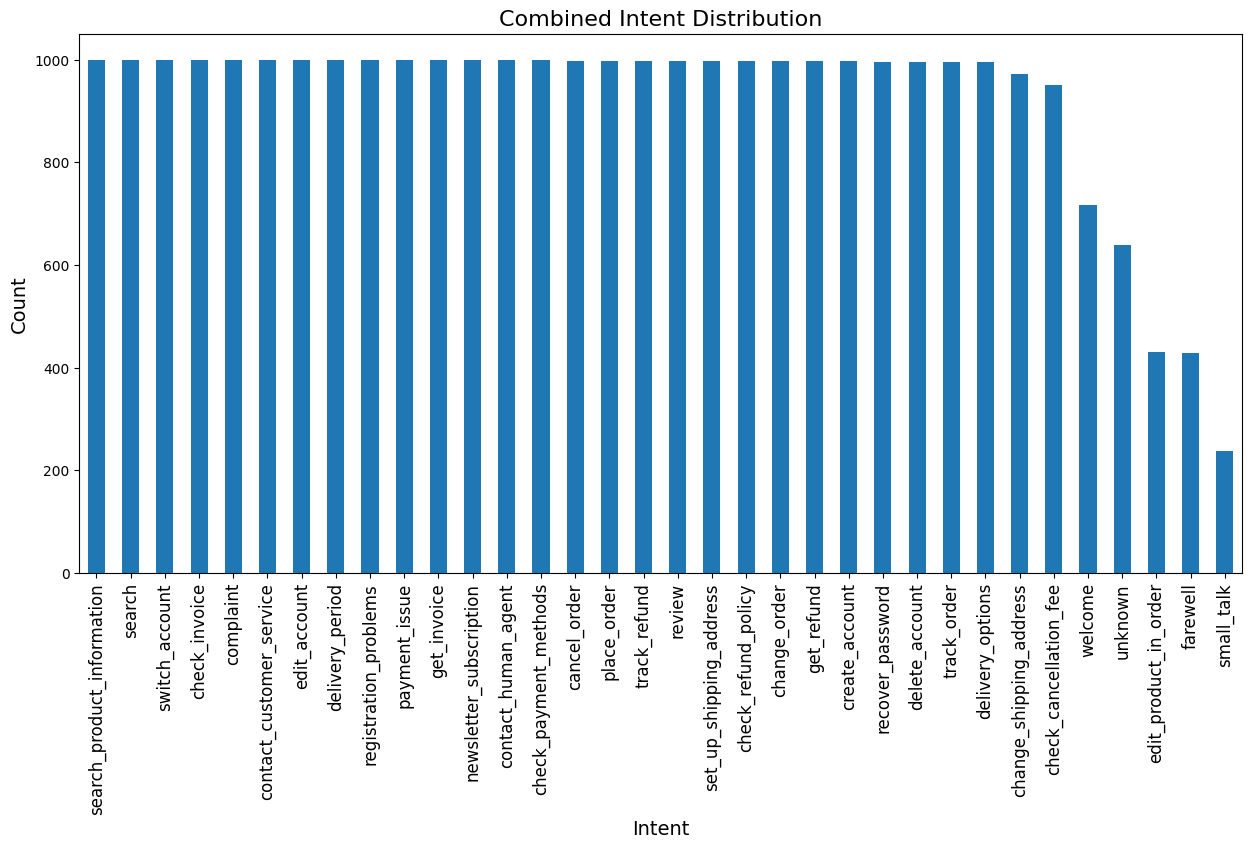

In [ ]:
import matplotlib.pyplot as plt

unique_intents = combined_df['intent'].unique()
intent_counts = combined_df['intent'].value_counts()

print("Unique intents:", unique_intents)
print("Intent counts:\n", intent_counts)

# Get the data
intents = combined_df['intent'].unique()
counts = combined_df['intent'].value_counts()

# Create the plot
plt.figure(figsize=(15, 7))
counts.plot(kind='bar')

# Add labels and title
plt.xlabel("Intent", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Combined Intent Distribution", fontsize=16)

# Rotate x-axis labels for readability
plt.xticks(rotation=90, fontsize=12)

# Show the plot
plt.show()

In [ ]:
import os

for intent in unique_intents:
  df_intent = combined_df[combined_df['intent'] == intent]
  filename = f'df_{intent}.csv'
  path = os.path.join('/content/drive/MyDrive/Final_dataset', filename)
  df_intent.to_csv(path, index=False)


In [ ]:
# from all the available intent files available in final dataset folder
# we have selected some intent for classification model training
# the intents used in classification training are available in
# https://drive.google.com/drive/folders/1HGXwYT4QqPsxtrE8hP2If0GcjfL8n3w2?usp=sharing